In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import requests

In [2]:
# 1. Load the SVHN dataset
svhn_train = loadmat('train_32x32.mat')
svhn_test = loadmat('test_32x32.mat')

In [3]:
# Extract images and labels
X_train = svhn_train['X']
y_train = svhn_train['y']
X_test = svhn_test['X']
y_test = svhn_test['y']


In [4]:
# 2. Check the data shape
print("Train images shape:", X_train.shape)  # (32, 32, 3, num_samples)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train images shape: (32, 32, 3, 73257)
Train labels shape: (73257, 1)
Test images shape: (32, 32, 3, 26032)
Test labels shape: (26032, 1)


In [5]:
# Reshape the data to match TensorFlow's expected input
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)
print("Reshaped train images:", X_train.shape)  # Now (num_samples, 32, 32, 3)

Reshaped train images: (73257, 32, 32, 3)


In [6]:
# 3. Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# Correct labels: In the dataset, the label '10' represents '0', fix it
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [8]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# 4. Split the train set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
# 5. Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\ICS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# 6. Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7998 - loss: 0.6681 - val_accuracy: 0.8527 - val_loss: 0.4930
Epoch 2/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8379 - loss: 0.5492 - val_accuracy: 0.8637 - val_loss: 0.4509
Epoch 3/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8626 - loss: 0.4691 - val_accuracy: 0.8863 - val_loss: 0.3918
Epoch 4/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8789 - loss: 0.4182 - val_accuracy: 0.8931 - val_loss: 0.3617
Epoch 5/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8858 - loss: 0.3871 - val_accuracy: 0.8961 - val_loss: 0.3523
Epoch 6/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8942 - loss: 0.3604 - val_accuracy: 0.8999 - val_loss: 0.3429
Epoch 7/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9008 - loss: 0.3450 - val_accuracy: 0.9006 - val_loss: 0.3431
Epoch 8/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9026 - loss: 0.3306 - 

In [42]:
# 7. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9009 - loss: 0.3667
Test accuracy: 0.9022


In [44]:
# 8. Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


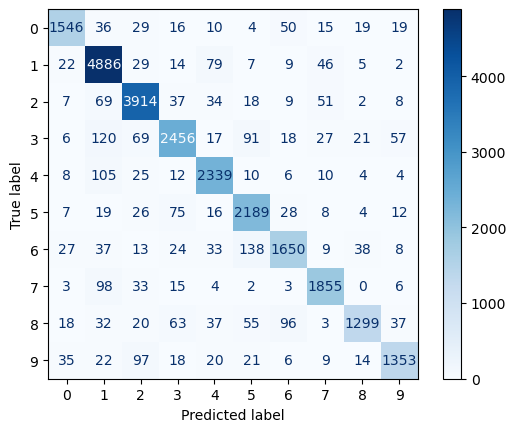

In [46]:
# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [48]:
# 10. Visualize test samples with predicted and true labels
# Choose indices for samples to display
indices = range(15) # You can choose any indices of interest

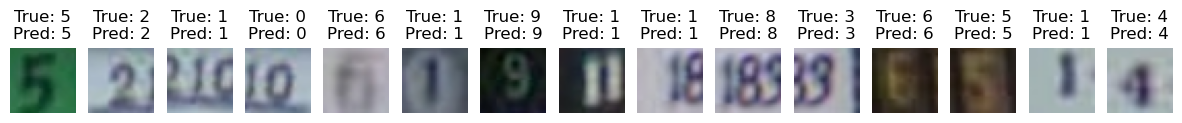

In [50]:
# Plot the selected test samples
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.show()
